<a href="https://colab.research.google.com/github/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***RODOLFO VALIENTE ROMERO***

#HW 2

** *Code is based on course notes and was used code from the Colab examples**

The goal of this homework is to create a convolutional neural network for the CIFAR10 data set. 
See [this colab notebook](https://colab.research.google.com/drive/1LZZviWOzvchcXRdZi2IBx3KOpQOzLalf) how to load the CIFAR data in Keras.

You should not use any pretrained convnets that come with Keras. You have to create and train your own convnets with Keras from scratch.

## Loading the image data CIFAR10 data set and functions

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from google.colab import files
import numpy as np
from keras.utils import np_utils
from keras.models import load_model

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)

In [0]:

def model_basic():
  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def model_basic_batchnorm():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def model_basic_batchnorm_strides():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3), strides = (1,1),activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(64, (3, 3), strides = (1,1),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 3
  model.add(layers.Conv2D(128, (3, 3), strides = (2,2),activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 4
  model.add(layers.Conv2D(128, (3, 3),strides = (1,1), activation='relu',padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))

  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model


def model_simpler():

  model = models.Sequential()
  # conv layers
  # 1
  model.add(layers.Conv2D(32, (3, 3),activation='relu',padding='same', input_shape=(32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # 2
  model.add(layers.Conv2D(32, (3, 3),activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2, 2))
  # dense layers
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(10, activation='softmax'))
  model.summary()
  return model

def split_data(train_images,train_labels):
  indxs = np.random.permutation(len(train_images))

  val_indx = indxs[0:2000]
  train_indx = indxs[2000:]

  val_images, val_labels = train_images[val_indx], train_labels[val_indx]

  train_images_split, train_labels_split = train_images[train_indx], train_labels[train_indx]
  train_images_norm = (train_images_split/255).astype('float32')
  train_labels_norm = np_utils.to_categorical(train_labels_split, 10)

  val_images_norm = (val_images/255).astype('float32')
  val_labels_norm = np_utils.to_categorical(val_labels, 10)
  return (train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)


def model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,name,bs= 64,e=5):
  model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
  )
  history = model.fit(train_images_norm, train_labels_norm, batch_size= bs, epochs= e,
                      verbose=1, validation_data=(val_images_norm, val_labels_norm))
  
  
  file_name = 'model_hold_out_%s.h5'% name
  #file_name_w = 'model_w_hold_out_%s.h5'% name
  #model.save_weights(file_name_w)
  model.save(file_name)
  
  with open(file_name, 'r') as f:
    files.download(file_name)
  
  return history


def model_compile_RMS(model):
  model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizers.RMSprop(lr=1e-4),
      metrics=['acc']
  )
  return model

def model_compile_adam(model):
  model.compile(
      loss='categorical_crossentropy', 
      optimizer='adam',
      metrics=['acc']
  )
  return model


def model_load_evaluate(file_name,test_images_norm,test_labels_norm):
  if file_name=="model_hold_out_simpler.h5":
   !wget  https://github.com/rvalienter90/UCF/tree/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true \
    -O model_hold_out_simpler.h5
  
 
  model=load_model(file_name)
  loss,acc = model.evaluate(test_images_norm, test_labels_norm)
  print("Restored model, accuracy: {:5.2f}%".format(100*acc))

  

###Explore data

In [0]:
print(train_images.shape)
print(len(train_images))
print(train_images.ndim)
print(train_images.dtype)
print(train_labels)
print(train_labels.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000
4
uint8
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
(50000, 1)
50000


### Displaying 

In [0]:
import matplotlib.pyplot as plt
class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = 0
image = train_images[index]

(32, 32, 3)


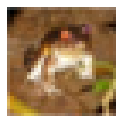

In [0]:
print(image.shape)
plt.figure(figsize=(2, 2))
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.imshow(image)
plt.show()

In [0]:
label = train_labels[index, 0]
print(label)
print(class_names[label])

6
frog


In [0]:
table = [[] for _ in range(10)]
for i in range(len(train_images)):
  label = train_labels[i, 0]
  table[label].append(i)

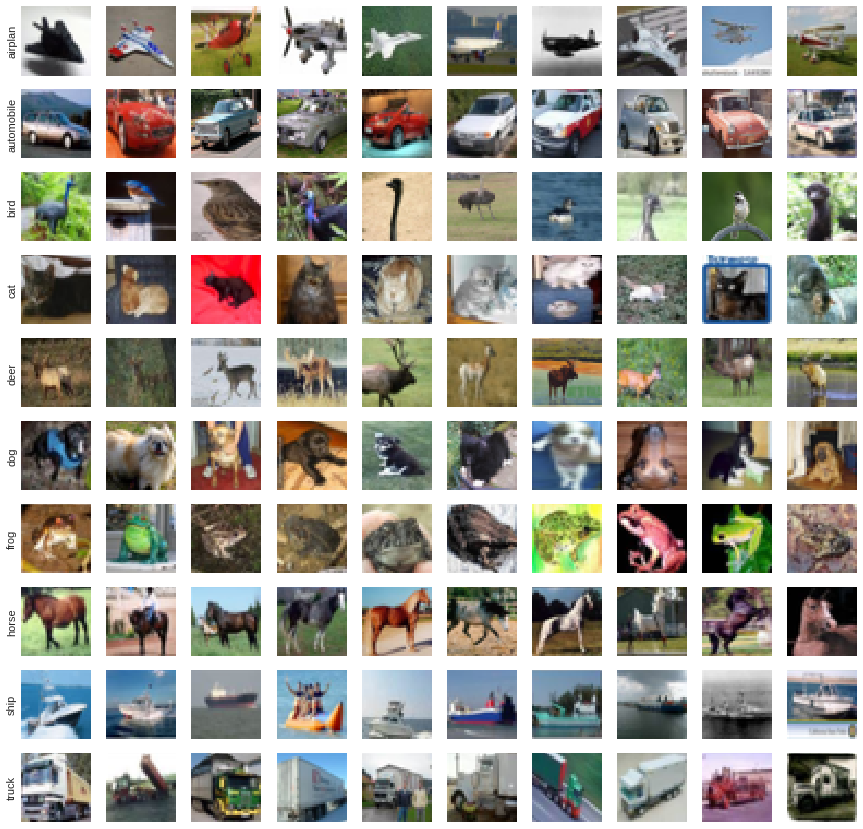

In [0]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(10):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

In [0]:
#split data
import numpy as np
from keras.utils import np_utils
indxs = np.random.permutation(len(train_images))

val_indx = indxs[0:2000]
train_indx = indxs[2000:]

val_images, val_labels = train_images[val_indx], train_labels[val_indx]

train_images_split, train_labels_split = train_images[train_indx], train_labels[train_indx]

In [0]:
train_images_norm = (train_images_split/255).astype('float32')
train_labels_norm = np_utils.to_categorical(train_labels_split, 10)

val_images_norm = (val_images/255).astype('float32')
val_labels_norm = np_utils.to_categorical(val_labels, 10)

test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)

## 1-Simple hold-out validation

Make sure that the data is divided into: 

- training set (80%)
- validation set (20%)
- test set. 

Use the training set to train your neural networks. Evaluate their performance on the validation data set. 

After trying several different architectures, choose the one that performs
best of the validation set. Try at least four different architectures by using data augmentation, using dropout, varying the number of layers, the number of filters, etc.

Train this final architecture on the data from the training set and validation set and evaluate its performance on 
the test set.

### Build a small convnet

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 128)         147584    
__________

In [0]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy', 
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [0]:
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 17s 346us/step - loss: 1.8536 - acc: 0.3312 - val_loss: 1.6311 - val_acc: 0.4255
Epoch 2/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.5424 - acc: 0.4449 - val_loss: 1.4677 - val_acc: 0.4740
Epoch 3/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.4181 - acc: 0.4920 - val_loss: 1.4060 - val_acc: 0.4940
Epoch 4/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.3332 - acc: 0.5267 - val_loss: 1.3255 - val_acc: 0.5295
Epoch 5/20
48000/48000 [==============================] - 11s 239us/step - loss: 1.2616 - acc: 0.5516 - val_loss: 1.2721 - val_acc: 0.5520
Epoch 6/20
48000/48000 [==============================] - 12s 240us/step - loss: 1.2009 - acc: 0.5755 - val_loss: 1.1914 - val_acc: 0.5875
Epoch 7/20
48000/48000 [==============================] - 12s 240us/s

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 1s 135us/step
[0.8748006526947022, 0.6973]


#### Test adam optimzer (performs better)

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 14s 286us/step - loss: 0.9742 - acc: 0.6628 - val_loss: 0.9574 - val_acc: 0.6605
Epoch 2/20
48000/48000 [==============================] - 13s 263us/step - loss: 0.8027 - acc: 0.7212 - val_loss: 0.8611 - val_acc: 0.7025
Epoch 3/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.6888 - acc: 0.7603 - val_loss: 0.8393 - val_acc: 0.7165
Epoch 4/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.5884 - acc: 0.7963 - val_loss: 0.8499 - val_acc: 0.7240
Epoch 5/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.5096 - acc: 0.8219 - val_loss: 0.8097 - val_acc: 0.7325
Epoch 6/20
48000/48000 [==============================] - 12s 260us/step - loss: 0.4200 - acc: 0.8530 - val_loss: 0.8800 - val_acc: 0.7255
Epoch 7/20
48000/48000 [==============================] - 12s 259us/step - loss: 0.3554 - acc: 0.8757 - val_loss: 0.8

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 1s 136us/step
[1.4892166800498963, 0.7305]


 #### Test adam optimzer  + batchnormalization

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 453us/step - loss: 1.2628 - acc: 0.5537 - val_loss: 1.3102 - val_acc: 0.5490
Epoch 2/20
48000/48000 [==============================] - 20s 426us/step - loss: 0.8447 - acc: 0.7054 - val_loss: 1.1347 - val_acc: 0.6245
Epoch 3/20
48000/48000 [==============================] - 20s 420us/step - loss: 0.6736 - acc: 0.7654 - val_loss: 1.0241 - val_acc: 0.6520
Epoch 4/20
48000/48000 [==============================] - 20s 420us/step - loss: 0.5444 - acc: 0.8114 - val_loss: 0.8471 - val_acc: 0.6990
Epoch 5/20
48000/48000 [==============================] - 19s 399us/step - loss: 0.4453 - acc: 0.8446 - val_loss: 0.7998 - val_acc: 0.7430
Epoch 6/20
48000/48000 [==============================] - 19s 398us/step - loss: 0.3552 - acc: 0.8761 - val_loss: 0.8133 - val_acc: 0.7615
Epoch 7/20
48000/48000 [==============================] - 19s 396us/step - loss: 0.2752 - acc: 0.9052 - val_loss: 0.8

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 2s 164us/step
[1.3725102286338806, 0.7374]


 #### Test adam optimzer  + batchnormalization + strides

In [0]:
model = models.Sequential()
# conv layers
# 1
model.add(layers.Conv2D(32, (3, 3), strides = (1,1),activation='relu',padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 2
model.add(layers.Conv2D(64, (3, 3), strides = (1,1),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 3
model.add(layers.Conv2D(128, (3, 3), strides = (2,2),activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
# 4
model.add(layers.Conv2D(128, (3, 3),strides = (1,1), activation='relu',padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

# dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_9 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [0]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(train_images_norm, train_labels_norm, batch_size= 64, epochs= 20,
                    verbose=1, validation_data=(val_images_norm, val_labels_norm))

Train on 48000 samples, validate on 2000 samples
Epoch 1/20
48000/48000 [==============================] - 16s 336us/step - loss: 1.3124 - acc: 0.5324 - val_loss: 1.3702 - val_acc: 0.5385
Epoch 2/20
48000/48000 [==============================] - 14s 301us/step - loss: 0.9390 - acc: 0.6694 - val_loss: 1.1385 - val_acc: 0.6035
Epoch 3/20
48000/48000 [==============================] - 14s 299us/step - loss: 0.7748 - acc: 0.7278 - val_loss: 2.0470 - val_acc: 0.4375
Epoch 4/20
48000/48000 [==============================] - 14s 300us/step - loss: 0.6668 - acc: 0.7672 - val_loss: 0.9687 - val_acc: 0.6645
Epoch 5/20
48000/48000 [==============================] - 14s 297us/step - loss: 0.5653 - acc: 0.8024 - val_loss: 0.8868 - val_acc: 0.6840
Epoch 6/20
48000/48000 [==============================] - 14s 298us/step - loss: 0.4826 - acc: 0.8333 - val_loss: 0.9854 - val_acc: 0.6920
Epoch 7/20
48000/48000 [==============================] - 14s 299us/step - loss: 0.4035 - acc: 0.8579 - val_loss: 1.0

In [0]:
scores = model.evaluate(test_images_norm, test_labels_norm, verbose=1)
print(scores)

10000/10000 [==============================] - 2s 156us/step
[1.4206374283790588, 0.7199]


### Buil a simpler model


In [0]:
(train_images_norm,train_labels_norm,val_images_norm,val_labels_norm)=split_data(train_images,train_labels)

In [49]:
model=model_simpler()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [52]:
model_compile_and_fit(model,train_images_norm,train_labels_norm,val_images_norm,val_labels_norm,'simpler')

Train on 48000 samples, validate on 2000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 253us/step - loss: 1.0155 - acc: 0.6435 - val_loss: 1.0781 - val_acc: 0.6180
Epoch 2/5
48000/48000 [==============================] - 11s 221us/step - loss: 0.8512 - acc: 0.7041 - val_loss: 1.3751 - val_acc: 0.5830
Epoch 3/5
48000/48000 [==============================] - 11s 221us/step - loss: 0.7538 - acc: 0.7363 - val_loss: 1.1776 - val_acc: 0.6090
Epoch 4/5
48000/48000 [==============================] - 11s 219us/step - loss: 0.6717 - acc: 0.7637 - val_loss: 1.1187 - val_acc: 0.6120
Epoch 5/5
48000/48000 [==============================] - 11s 220us/step - loss: 0.6105 - acc: 0.7857 - val_loss: 0.8634 - val_acc: 0.7100


MessageError: ignored

In [0]:
test_images_norm = (test_images/255).astype('float32')
test_labels_norm = np_utils.to_categorical(test_labels, 10)
loss,acc = model.evaluate(test_images_norm, test_labels_norm)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 115us/step
Restored model, accuracy: 69.04%


In [0]:
file_name_w = 'model_w_hold_out_simpler.h5'
model2=model_simpler()
model2.load_weights(file_name_w)
model2.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['acc']
  )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)              0         
__________

In [0]:
loss,acc = model2.evaluate(test_images_norm, test_labels_norm)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 2s 174us/step
Restored model, accuracy: 69.04%


In [0]:
file_name_w = 'model_w_hold_out_simpler.h5'
files.download(file_name_w)

In [0]:
from keras.models import load_model
model3=load_model(file_name)

In [0]:
loss,acc = model3.evaluate(test_images_norm, test_labels_norm)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

10000/10000 [==============================] - 1s 149us/step
Restored model, accuracy: 69.04%


In [41]:
!wget  https://github.com/rvalienter90/UCF/tree/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true \
  -O model_hold_out_simpler.h5

--2019-04-02 02:31:32--  https://github.com/rvalienter90/UCF/tree/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5 [following]
--2019-04-02 02:31:32--  https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘model_hold_out_simpler.h5’

model_hold_out_simp     [ <=>                ]  56.12K  --.-KB/s    in 0.03s   

2019-04-02 02:31:33 (2.14 MB/s) - ‘model_hold_out_simpler.h5’ saved [57464]



In [0]:
from google.colab import files

with open(file_name, 'r') as f:
  files.download(file_name)

In [42]:
!ls

cats_and_dogs_small_2.h5  filename  model_hold_out_simpler.h5  sample_data


In [45]:
!wget  https://github.com/schneider128k/machine_learning_course/blob/master/code/convnets/cats_and_dogs_small_2.h5?raw=true \
  -O cats_and_dogs_small_2.h5
model = load_model('cats_and_dogs_small_2.h5')

--2019-04-02 02:32:26--  https://github.com/schneider128k/machine_learning_course/blob/master/code/convnets/cats_and_dogs_small_2.h5?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/schneider128k/machine_learning_course/raw/master/code/convnets/cats_and_dogs_small_2.h5 [following]
--2019-04-02 02:32:26--  https://github.com/schneider128k/machine_learning_course/raw/master/code/convnets/cats_and_dogs_small_2.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/schneider128k/machine_learning_course/master/code/convnets/cats_and_dogs_small_2.h5 [following]
--2019-04-02 02:32:26--  https://raw.githubusercontent.com/schneider128k/machine_learning_course/master/code/convnets/cats_and_dogs_small_2.h5
Resolving raw.githubusercon

In [0]:
from keras.models import load_model

In [44]:
model = load_model('model_hold_out_simpler.h5')

OSError: ignored

In [36]:
file_name = 'model_hold_out_simpler.h5'
model_load_evaluate(file_name,test_images_norm,test_labels_norm)

--2019-04-02 02:26:49--  https://github.com/rvalienter90/UCF/tree/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5?raw=true
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5 [following]
--2019-04-02 02:26:49--  https://github.com/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW2/model_hold_out_simpler.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘model_hold_out_simpler.h5’

model_hold_out_simp     [ <=>                ]  56.12K  --.-KB/s    in 0.03s   

2019-04-02 02:26:49 (2.11 MB/s) - ‘model_hold_out_simpler.h5’ saved [57463]



OSError: ignored

## Problem 1 Final Solution- Simple hold-out validation

## 2- k-fold validation

Reevaluate your best architecture using k-fold validation with k=5, that is, the size of the validation fold is 20%. Does the accuracy/loss obtain by k-fold validation differ from the accuracy/loss obtain by simple hold-out validation.

## Problem 2 FInal Solution- k-fold validation